# Analog to Digital Encoding: Sampling Rate and Bit-Depth

> AJ Federici & Ryan Soklaski

This notebook provides some insight into [pulse code modulation](https://en.wikipedia.org/wiki/Pulse-code_modulation), which is the process that we have been discussing for digitally representing an analog signal. As discussed in class, the digital encoding  of an analog signal, via PCM, is characterized by two primary factors:
1. The **sampling rate**: the number of times that we sample the analog signal each second (sampling evenly in time)
2. The **bit-depth**: the number of bits that we can use to record the amplitude of the signal. E.g. A 4-bit encoding would only permit us to use only $2^4 = 16$ distinct amplitude values in our digital representation of the signal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from audio_sampling import analog_to_digital, song_to_digital, turn_off_ticks

import numpy as np
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

The following plot shows an analog signal (blue curve) *whose duration is 2 seconds*, and various digitized versions of the signal (orange). The bit-depth used in the digital encoding scheme varies across the plot's columns: 
- 2 bits to 4 bits to 8 bits (left to right). 

The sampling rate varies from row-to-row: 
- 1 Hz to 10 Hz to 100 Hz (top to bottom).

Study how these two factors impact the digital signal's quality in replicating the analog signal. Converse with your neighbors and share your observations.

<IPython.core.display.Javascript object>


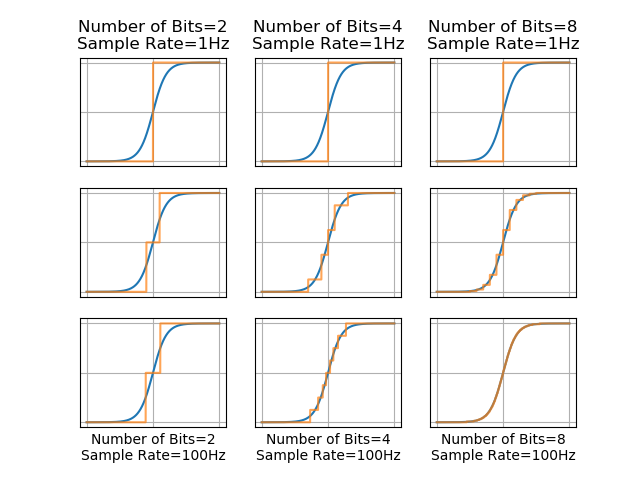

In [3]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=3, ncols=3)

for i, sample_rate in enumerate([1, 10, 100]):
    for j, bits in enumerate([2, 4, 8]):
        analog_to_digital(axes[i, j], sample_rate, bits, digital_graph=True)
        #axes[i, j].xaxis.set_major_locator(plt.NullLocator())
        #axes[i, j].yaxis.set_major_locator(plt.NullLocator())
        if (i == 0 or i == 2):
            if i == 0:
                axes[i, j].set_title("Number of Bits={}\nSample Rate={}Hz".format(bits, sample_rate))
            else:
                axes[i, j].set_xlabel("Number of Bits={}\nSample Rate={}Hz".format(bits, sample_rate))
        axes[i, j].grid(True)
        turn_off_ticks(axes[i, j])

Now we will experience how these digitization artifacts manifest in actual digital music. Update the following path to point to a music file (.mp3, .wav; it may be that other formats are supported too).

In [41]:
from pathlib import Path

# make sure that this variable is assigned to a path to a music file on your computer

song_root = Path(r"/home/fish/Music")
local_song_path = song_root / r"bach.mp3"

# load the digital signal for the first 11 seconds of the song
samples, fs = librosa.load(local_song_path, sr=44100, mono=True, duration=21)

Executing the following code will plot the native digital waveform for the first 11 seconds of the song you selected. It is likely that this recording was digitized at a sampling rate of 44100 Hz, and with a bit-depth of 16. Plotted on top of it is the signal digitized with a 10 Hz sampling rate, and a bit-depth of 6. Note that this digitization washes out nearly all of the song's features.

<IPython.core.display.Javascript object>


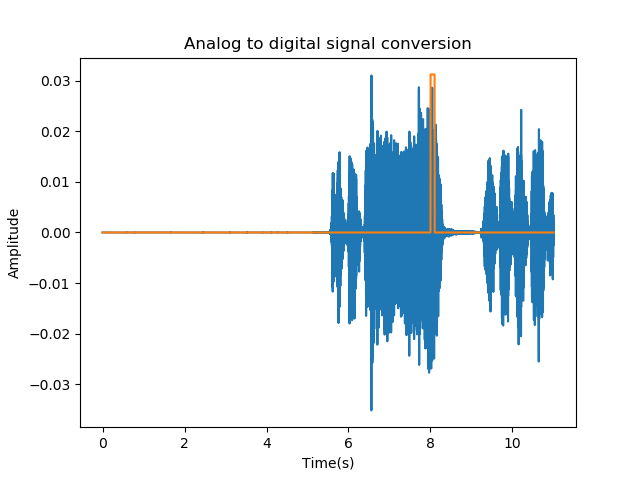

In [9]:
sampling_rate = 10. # Hz
quantizing_bits = 6
song_to_digital(local_song_path, sampling_rate, quantizing_bits)

Finally, let's listen to this 11 second clip using various values for `sampling_rate` and `bit_depth`. Start with settings that will perfectly recreate the audio clip and then go from there!

In [64]:
bit_depth = 8
sampling_rate = 7777

In [66]:
# This is how the song sounds given your sampling rate and decision for how many bits of info to use when sampling
# Will use the same sampling and quantizing bits variables as above
# Read through this cell and then run it

time = np.linspace(0, 21, 21 * 44100)  # play 11-seconds-worth of samples
skip = int(len(samples) / (11 * sampling_rate))
sampling_signal = samples[::skip]

quantizing_levels = 2 ** (bit_depth - 1)
quantizing_step = 1. / quantizing_levels

quantizing_signal = np.round (sampling_signal / quantizing_step) * quantizing_step

# create a new signal as if it was sampled at `sampling_rate` frequency
# try changing this and playing the audio again
new_l = len(time) / len(quantizing_signal)

new_y = []
for i in range(len(quantizing_signal)):
    new_y += [quantizing_signal[i]] * int(new_l)

Audio(new_y, rate=44100)